# Proyek Analisis Data: E-commerce Public Dataset
- Nama: Nabila Karima Azka
- Email: nabilakarimaazka@gmail.com
- Id Dicoding: nabilakarima

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Berapa jumlah order setiap bulannya?
- pertanyaan 2 : Bagaimana pendapatan setiap bulannya?
- pertanyaan 3 : City dan State mana yang menjadi wilayah dengan jumlah order paling banyak?
- pertanyaan 4 : Product apa saja yang paling laris dan paling sedikit di order?
- pertanyaan 5 : Bagaimana distribusi waktu order dalam 24 jam? Pada jam berapakah customer paling banyak melakukan order?
- pertanyaan 6 : Kapan terakhir pelanggan melakukan transaksi?
- pertanyaan 7 : Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- pertanyaan 8 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- pertanyaan 9 : Bagaimana segmentasi customer pada e-commerce? kelompok customer manakah yang paling mendominasi?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# mengambil data order

orders_df = pd.read_csv("https://raw.githubusercontent.com/nabilakarimaazka/final_project/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# mengambil data item yang di order

orders_items_df = pd.read_csv("https://raw.githubusercontent.com/nabilakarimaazka/final_project/main/data/order_items_dataset.csv")
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# mengambil data product

product_df = pd.read_csv("https://raw.githubusercontent.com/nabilakarimaazka/final_project/main/data/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
# mengambil data customer

customers_df = pd.read_csv("https://raw.githubusercontent.com/nabilakarimaazka/final_project/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# mengambil data payment

payment_df = pd.read_csv("https://raw.githubusercontent.com/nabilakarimaazka/final_project/main/data/order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

###### Tabel orders_df

In [7]:
# melihat info dari tabel
orders_df.info()

# ada null value di beberapa kolom
# terdapat kesalahan tipe data di order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivered_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
# melihat jumlah data null
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
# cek duplikat data
orders_df.duplicated().sum()

0

In [10]:
# melihat deskripsi data
orders_df.describe()

# Dapat dilihat disini terdapat total 99441 order dengan beberapa kolom terdapat missing value serta terdapat delapan kategori status order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


###### Tabel order_items_df

In [11]:
# melihat info dari tabel
orders_items_df.info()

# terdapat kesalahan tipe data di kolom shipping limit date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
# melihat jumlah data null
orders_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
# cek data duplikat
orders_items_df.duplicated().sum()

0

In [14]:
# melihat deskripsi data
orders_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


###### Tabel product_df

In [15]:
# melihat info data
product_df.info()

# masih terdapat null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
# cek null value

product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [17]:
# cek duplikasi data dan melihat deskripsi tabel

print("Jumlah duplikasi: ",product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


###### Tabel customers_df

In [18]:
# melihat info data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
# cek duplikasi data dan melihat deskripsi tabel

print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


###### Tabel payment_df

In [20]:
# melihat info data
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
# cek duplikasi data dan melihat deskripsi tabel

print("Jumlah duplikasi: ", payment_df.duplicated().sum())
payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

###### Tabel orders_df

In [22]:
# menangani missing value
# ada 3 kolom dengan missing value, kita akan menangani satu persatu
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [23]:
# karena rata-rata order di approve dihari yang sama dengan order_purchase_timestamp, maka kita mengisi data yang kosong di kolom order_approved_at order_purchase_timestamp
# Hal ini yang akan mengisi nilai yang kosong dan tidak merubah nilai yang sudah terisi

orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
# cek apakah masih ada null value di kolom order_approved_at
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [25]:
# menangani missing value kolom order_delivered_carrier
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [26]:
# karena terdapat 1783 baris yang memiliki nilai koosng pada kolom order_delivered_carrier_date, maka kita akan mencari terlebih dahulu berapa rata-rata selisih waktu antara order_delivered_carrier_date dan order_approved_at
# setelah kita mengetahui selisihnya, maka kita mencari tahu berapa rata-rata selisih kedua kolom tersebut

orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['time_difference'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.days

In [27]:
# Menghitung nilai rata-rata dari selisih waktu
mean_time_difference = orders_df['time_difference'].mean()

In [28]:
# Mengisi nilai null pada kolom order_delivered_carrier_date dengan nilai rata2 selisih hari pengiriman dan tanggal approved order
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + pd.to_timedelta(mean_time_difference, unit='D'), inplace=True)

# Menghapus kolom time_difference yang tidak diperlukan
orders_df.drop(columns=['time_difference'], inplace=True)

In [29]:
# cek null value pada kolom order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [30]:
# Menangani missing value di kolom order_delivered_customer_date menggunakan metode yang sama dengan mengisi order_delivered_carrier, mencari rara-rata selisih pengiriman
# Menghitung selisih waktu antara order_delivered_carrier_date dan  order_delivered_customer_date

orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['time_difference'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days

In [31]:
# Menghitung nilai rata-rata dari selisih waktu
mean_time_difference = orders_df['time_difference'].mean()

In [32]:
# Mengisi nilai null pada kolom order_delivered_customer_date dengan nilai rata-rata
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'] + pd.to_timedelta(mean_time_difference, unit='D'), inplace=True)

# Menghapus kolom time_difference yg tidak diperlukan
orders_df.drop(columns=['time_difference'], inplace=True)

In [33]:
# cek null value pada kolom order_delivered_carrier_date
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [34]:
# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Mengubah kolom order_estimated_delivery_date menjadi tipe datetime
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Menampilkan DataFrame setelah perubahan tipe data
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


###### Tabel order_items_df

In [35]:
# Mengubah kolom shipping_limit_date menjadi tipe datetime
orders_items_df['shipping_limit_date'] = pd.to_datetime(orders_items_df['shipping_limit_date'])

In [36]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


###### Tabel product_df

In [37]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [38]:
# mengisi nilai kosong pada kolom product_category_name dengan nilai "Not Descriptiomn"
product_df['product_category_name'].fillna('Not Description', inplace=True)
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [39]:
# mengisi null value pada ketiga kolom berikut dengan 0

product_df['product_name_lenght'].fillna(0, inplace=True)
product_df['product_description_lenght'].fillna(0, inplace=True)
product_df['product_photos_qty'].fillna(0, inplace=True)
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [40]:
# karena sekarang terdapat nilai kosong pada product_wight, product_lenght, product_hegiht, product_widht yang mana hanya 2 baris, maka dapat dihapus saja

product_df = product_df.dropna()
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Explore Tabel orders_df

In [41]:
orders_df.describe(include = "all")

<ipython-input-41-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-41-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-41-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-41-2195dd28c06b>:1: Futur

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,82797,98620,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 17:41:33.935987200,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-20 00:45:11.935987200,2018-10-28 21:50:34.785225600,2018-11-12 00:00:00


In [42]:
# mencari selisih hari dari order approved dan tanggal pengiriman

orders_df['selisih_order_approved_pengiriman'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.days

In [43]:
orders_df['selisih_order_approved_pengiriman'].describe()

count    99441.000000
mean        11.631450
std          9.389789
min         -7.000000
25%          6.000000
50%         10.000000
75%         14.000000
max        208.000000
Name: selisih_order_approved_pengiriman, dtype: float64

Dapat dilihat pada deskripsi kolom selisish_order_approved_pengiriman diatas bahwa rata-rata selisih approve sampai barang dikirim adalah 11,63 hari. Sedangkan maksimal dari waktu selisih approved dan pengiriman adalah 208 hari. Tapi perlu diperhatikan lagi bahwa pada nilai minimal selisih approved order dan pengiriman terdapat minus, yang artinya barang sudah dikirim sebelum barang di order. Karena hal itu tidak memungkinkan maka kita akan mengubah tanggal delivered nya sama dengan tanggal approved order.

In [44]:
# Mengubah kolom menjadi tipe data datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Mengganti nilai 'delivery_date' dengan 'order_date' jika selisih ordernya kurang dari 0
x = orders_df['selisih_order_approved_pengiriman']
orders_df['order_delivered_customer_date'] = np.where(x < 0, orders_df['order_approved_at'], orders_df['order_delivered_customer_date'])

In [45]:
# menjalankan kembali baris kode ini agar selisih waktu order kembali dihitung
orders_df['selisih_order_approved_pengiriman'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.days

# cek apakah masih ada selisih order kuragn < 0
selisih_hari = orders_df[orders_df['selisih_order_approved_pengiriman'] < 0]
selisih_hari

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,selisih_order_approved_pengiriman


In [46]:
orders_df.describe(include = "all")

<ipython-input-46-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-46-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-46-2195dd28c06b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include = "all")
<ipython-input-46-2195dd28c06b>:1: Futur

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,selisih_order_approved_pengiriman
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,98875,90893,82797,98619,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 17:41:33.935987200,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-20 00:45:11.935987200,2018-10-28 21:50:34.785225600,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.632888
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.387732
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


Dari deskripsi tabel diatas dapat kita lihat bahwa kita memiliki data order sebanyak 99441 dengan kategori order status sebanyak 8 kategori. Sedangkan dapat kita ketahui pula rata-rata jarak antara approved_order dengan delivered_customer berkisar antara 0-208 hari dengan standar deviasi 9.38 dan rata-rata waktu pengiriman 11.53 hari.

### Explore Tabel customers_df dan orders_df

In [47]:
# join table customers_df dan orders_df

orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,selisih_order_approved_pengiriman,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [48]:
# drop kolom yang tidak diperlukan
orders_customers_df = orders_customers_df.drop(['order_delivered_carrier_date', 'order_estimated_delivery_date','customer_zip_code_prefix'], axis=1)

In [49]:
# mencari jumlah customer yang melakukan pembelain per bulan

# Kelompokkan data per bulan dan hitung jumlah pelanggan unik
monthly_customers = orders_customers_df.groupby(orders_customers_df['order_purchase_timestamp'].dt.to_period('M'))['customer_id'].nunique().reset_index()

# Ubah nama kolom agar lebih deskriptif
monthly_customers.columns = ['Bulan', 'Jumlah Customer']

# Tampilkan hasil
print(monthly_customers)

      Bulan  Jumlah Customer
0   2016-09                4
1   2016-10              324
2   2016-12                1
3   2017-01              800
4   2017-02             1780
5   2017-03             2682
6   2017-04             2404
7   2017-05             3700
8   2017-06             3245
9   2017-07             4026
10  2017-08             4331
11  2017-09             4285
12  2017-10             4631
13  2017-11             7544
14  2017-12             5673
15  2018-01             7269
16  2018-02             6728
17  2018-03             7211
18  2018-04             6939
19  2018-05             6873
20  2018-06             6167
21  2018-07             6292
22  2018-08             6512
23  2018-09               16
24  2018-10                4


In [50]:
## jumlah order berdasarkan city

orders_customers_df.groupby(by = "customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [51]:
# jumlah order berdasarkan state

orders_customers_df.groupby(by = "customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [52]:
# jmlah order berdasarsakan kategori status order

orders_customers_df.groupby(by = "order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore Tabel orders_items_df dan product_df

In [53]:
# join table order_items dan product_df

orders_product_df = pd.merge(
    left = orders_items_df,
    right = product_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)

orders_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [54]:
# mencari product category name yang paling bnyak terjual

orders_product_df.groupby(by = "product_category_name").order_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
utilidades_domesticas     5884
relogios_presentes        5624
telefonia                 4199
automotivo                3897
brinquedos                3886
Name: order_id, dtype: int64

In [55]:
# drop column yang tidak diperlukan

orders_product_df = orders_product_df.drop(['order_item_id', 'shipping_limit_date', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty','product_weight_g',	'product_length_cm',	'product_height_cm','product_width_cm'], axis=1)

In [56]:
orders_product_df

,order_id,product_id,seller_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios


### Explore ALl Table

In [57]:
# join all table

all_df = pd.merge(
    left = orders_customers_df,
    right = orders_product_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,selisih_order_approved_pengiriman,customer_unique_id,customer_city,customer_state,product_id,seller_id,price,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,8,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,12,af07308b275d755c9edb36a90c618231,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,9,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,13,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,22,da62f9e57a76d978d02ab5362c509660,praia grande,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,bebes
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,24,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,eletrodomesticos_2
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,17,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,informatica_acessorios
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,17,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,informatica_acessorios


In [58]:
# menghitung pendapatan per bulan

monthly_revenue = all_df.groupby(all_df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum().reset_index()

# Ubah nama kolom agar lebih deskriptif
monthly_revenue.columns = ['Month', 'Revenue']

# Tampilkan hasilnya
print(monthly_revenue)

      Month     Revenue
0   2016-09      267.36
1   2016-10    49507.66
2   2016-12       10.90
3   2017-01   120312.87
4   2017-02   247303.02
5   2017-03   374344.30
6   2017-04   359927.23
7   2017-05   506071.14
8   2017-06   433038.60
9   2017-07   498031.48
10  2017-08   573971.68
11  2017-09   624401.69
12  2017-10   664219.43
13  2017-11  1010271.37
14  2017-12   743914.17
15  2018-01   950030.36
16  2018-02   844178.71
17  2018-03   983213.44
18  2018-04   996647.75
19  2018-05   996517.68
20  2018-06   865124.31
21  2018-07   895507.22
22  2018-08   854686.33
23  2018-09      145.00
24  2018-10        0.00


In [59]:
# mencari distribusi waktu pembelian customer dalam satu hari

# Ekstrak jam dari kolom 'order_purchased'
all_df['purchase_time'] = all_df['order_purchase_timestamp'].dt.hour

# Hitung jumlah pembelian pada setiap jam
hourly_distribution = all_df['purchase_time'].value_counts().reset_index()
hourly_distribution.columns = ['Time', 'Jumlah_Pembelian']

# Urutkan berdasarkan jam
hourly_distribution = hourly_distribution.sort_values(by='Time')

In [60]:
hourly_distribution

,Time,Jumlah_Pembelian
16,0,2733
18,1,1303
19,2,589
21,3,317
22,4,245
23,5,219
20,6,558
17,7,1385
15,8,3399
13,9,5499


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah order setiap bulannya?

In [61]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
    })


monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
    }, inplace=True)

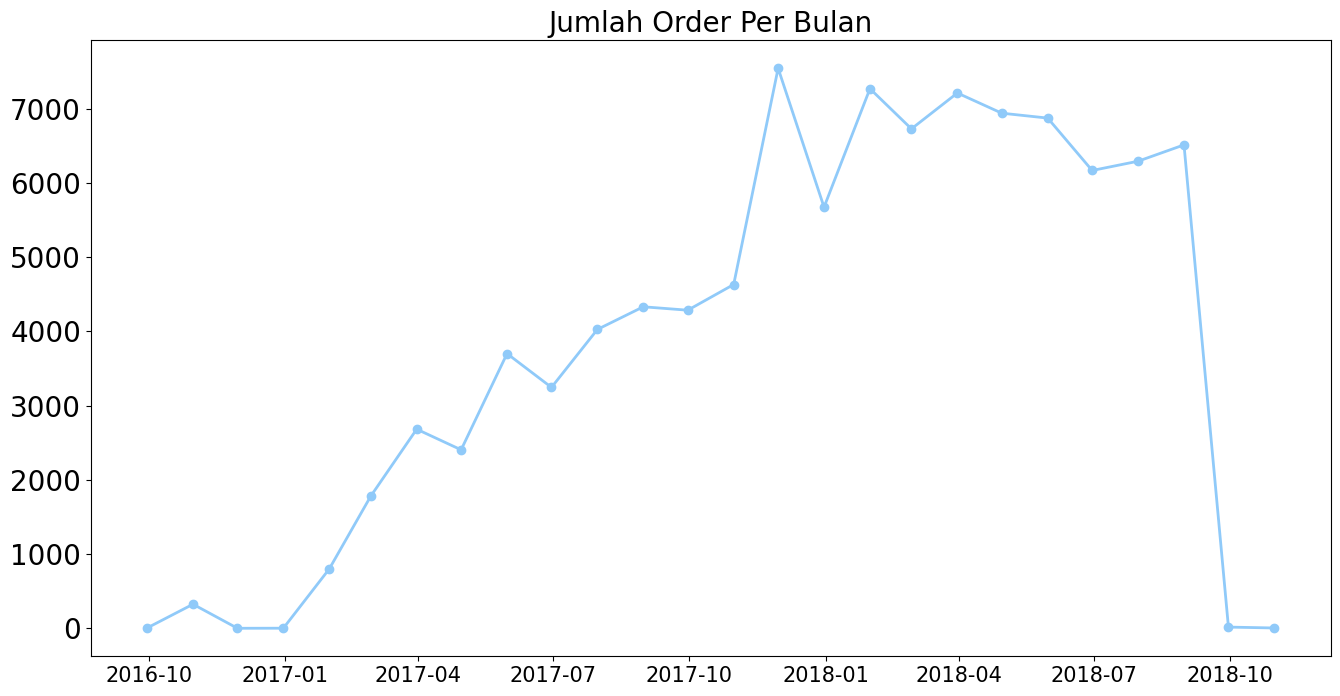

In [62]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.title("Jumlah Order Per Bulan", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

### Pertanyaan 2: Bagaimana pendapatan setiap bulannya?

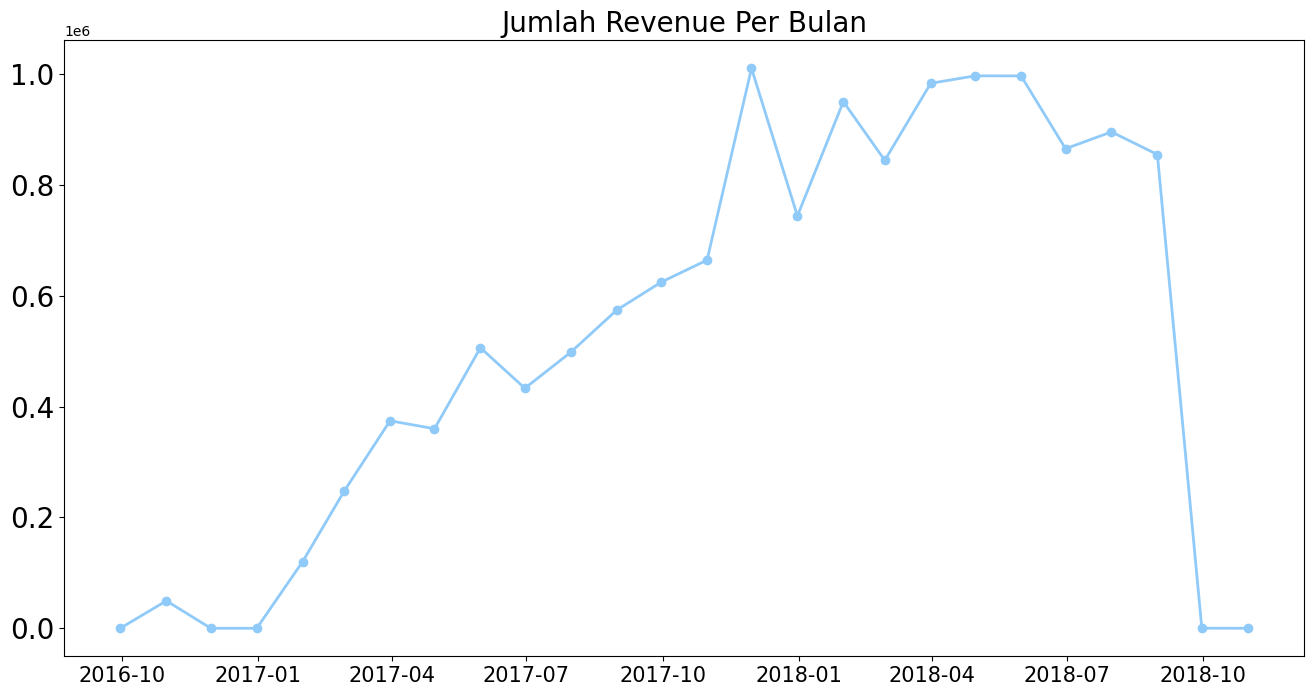

In [63]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.title("Jumlah Revenue Per Bulan", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

### Pertanyaan 3: City dan State mana yang menjadi wilayah dengan jumlah order paling banyak?

In [64]:
# kota dengan jumlah order terbanyak
bycity_df = all_df.groupby(by="customer_city").order_id.nunique().reset_index()
bycity_df.rename(columns={
    "order_id" : "order_count"
    }, inplace = True)

# state dengan jumlah order terbanyak
bystate_df = all_df.groupby(by="customer_state").order_id.nunique().reset_index()
bystate_df.rename(columns={
"order_id" : "order_count"
}, inplace = True)


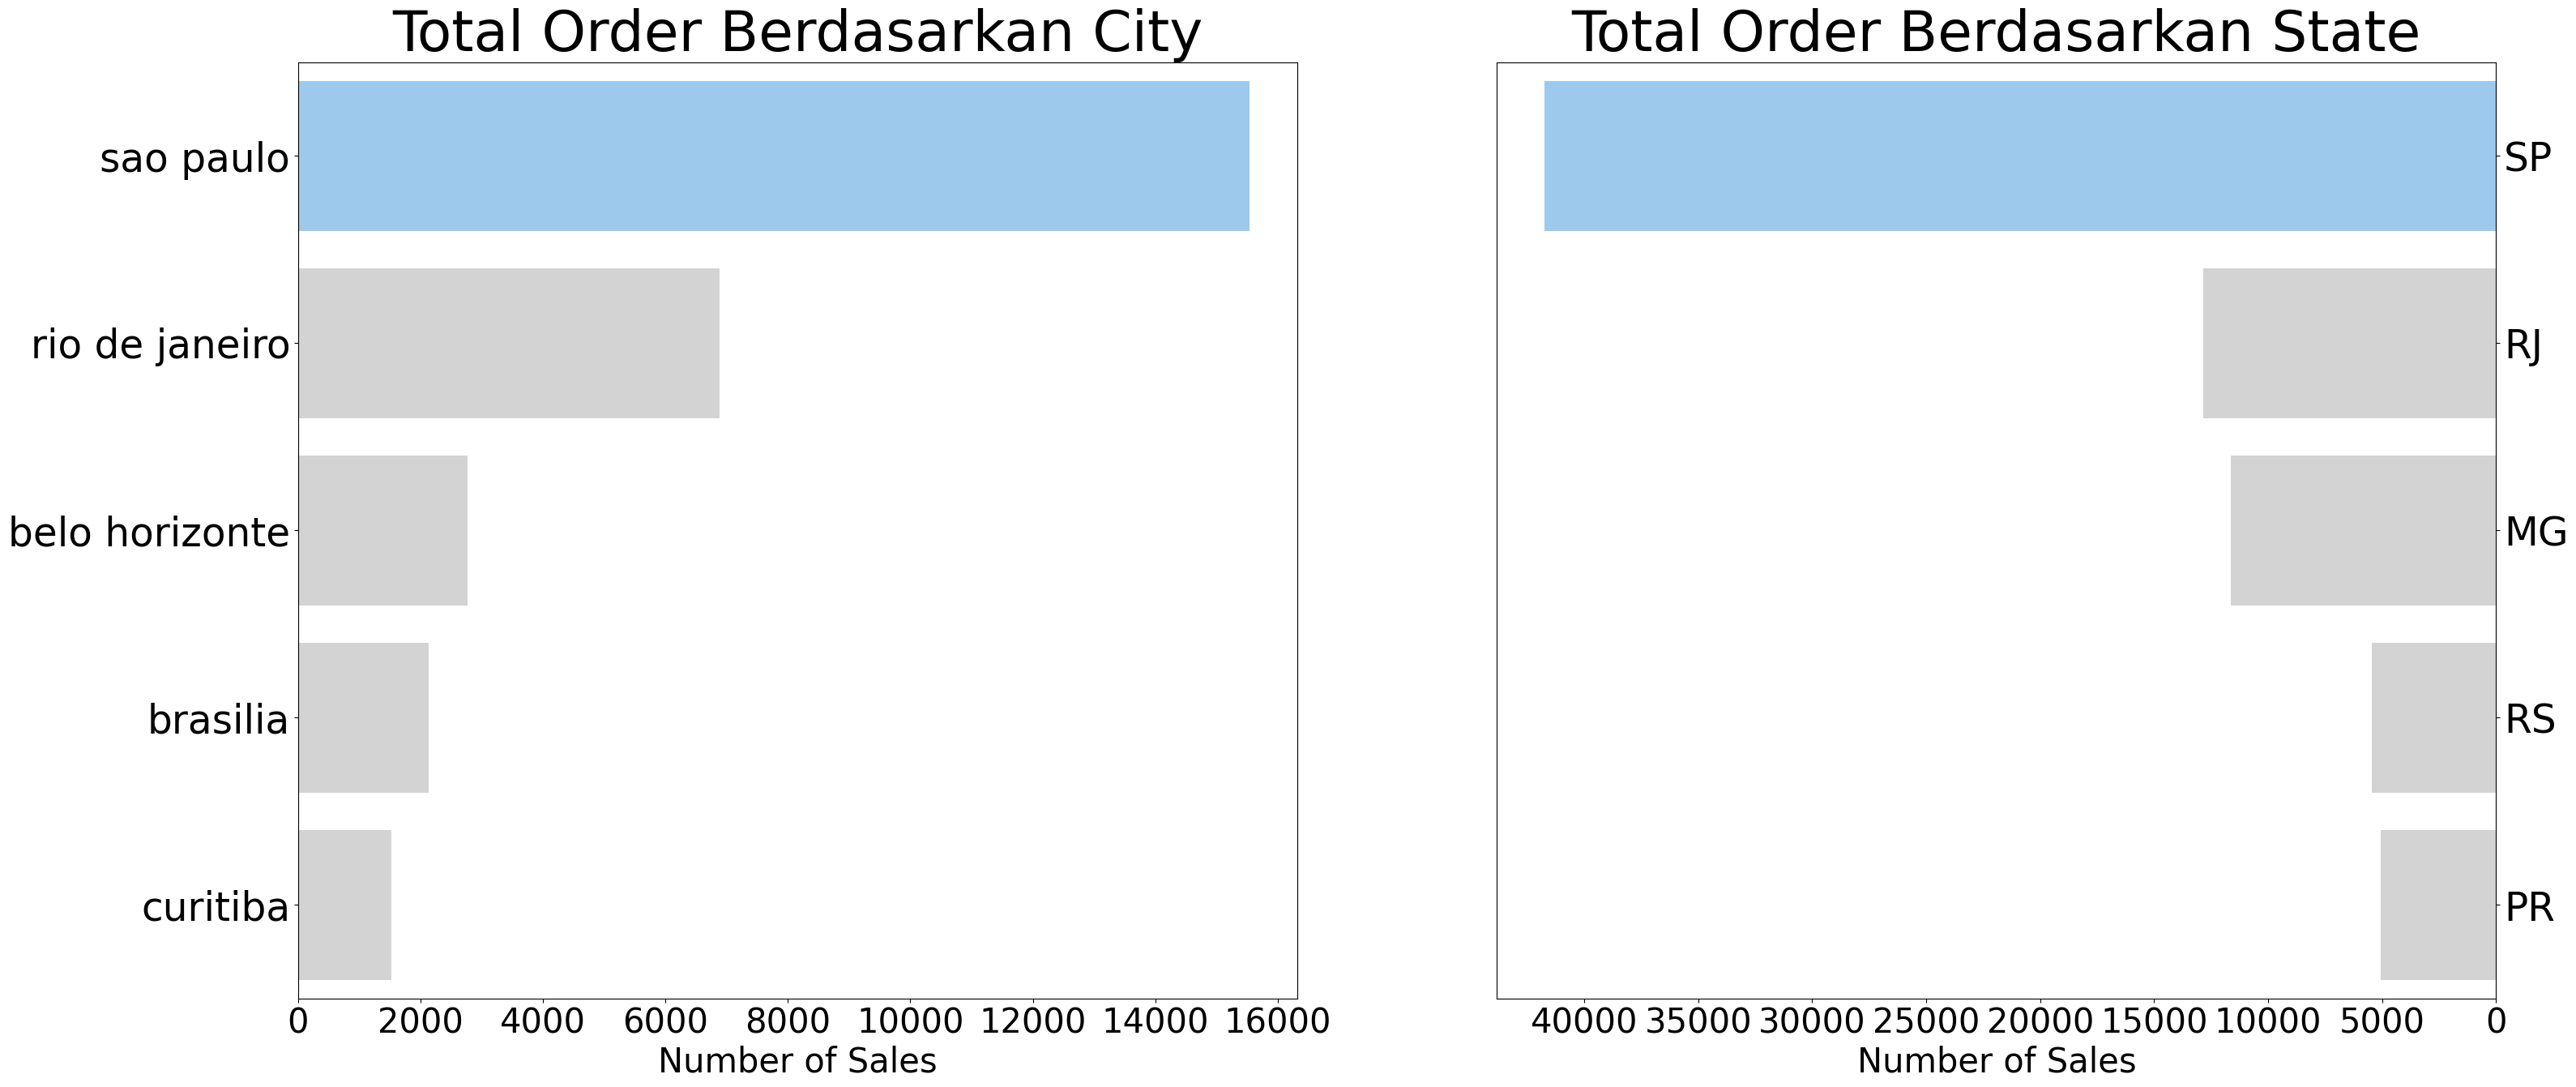

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="customer_city", data=bycity_df.sort_values(by="order_count", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Total Order Berdasarkan City", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="order_count", y="customer_state", data=bystate_df.sort_values(by="order_count", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Order Berdasarkan State", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

### Pertanyaan 4: Product apa saja yang paling laris dan paling sedikit di order?

In [66]:
# jumlah order setiap produk
sum_order_items_df = all_df.groupby("product_category_name").order_id.nunique().sort_values(ascending=False).reset_index()

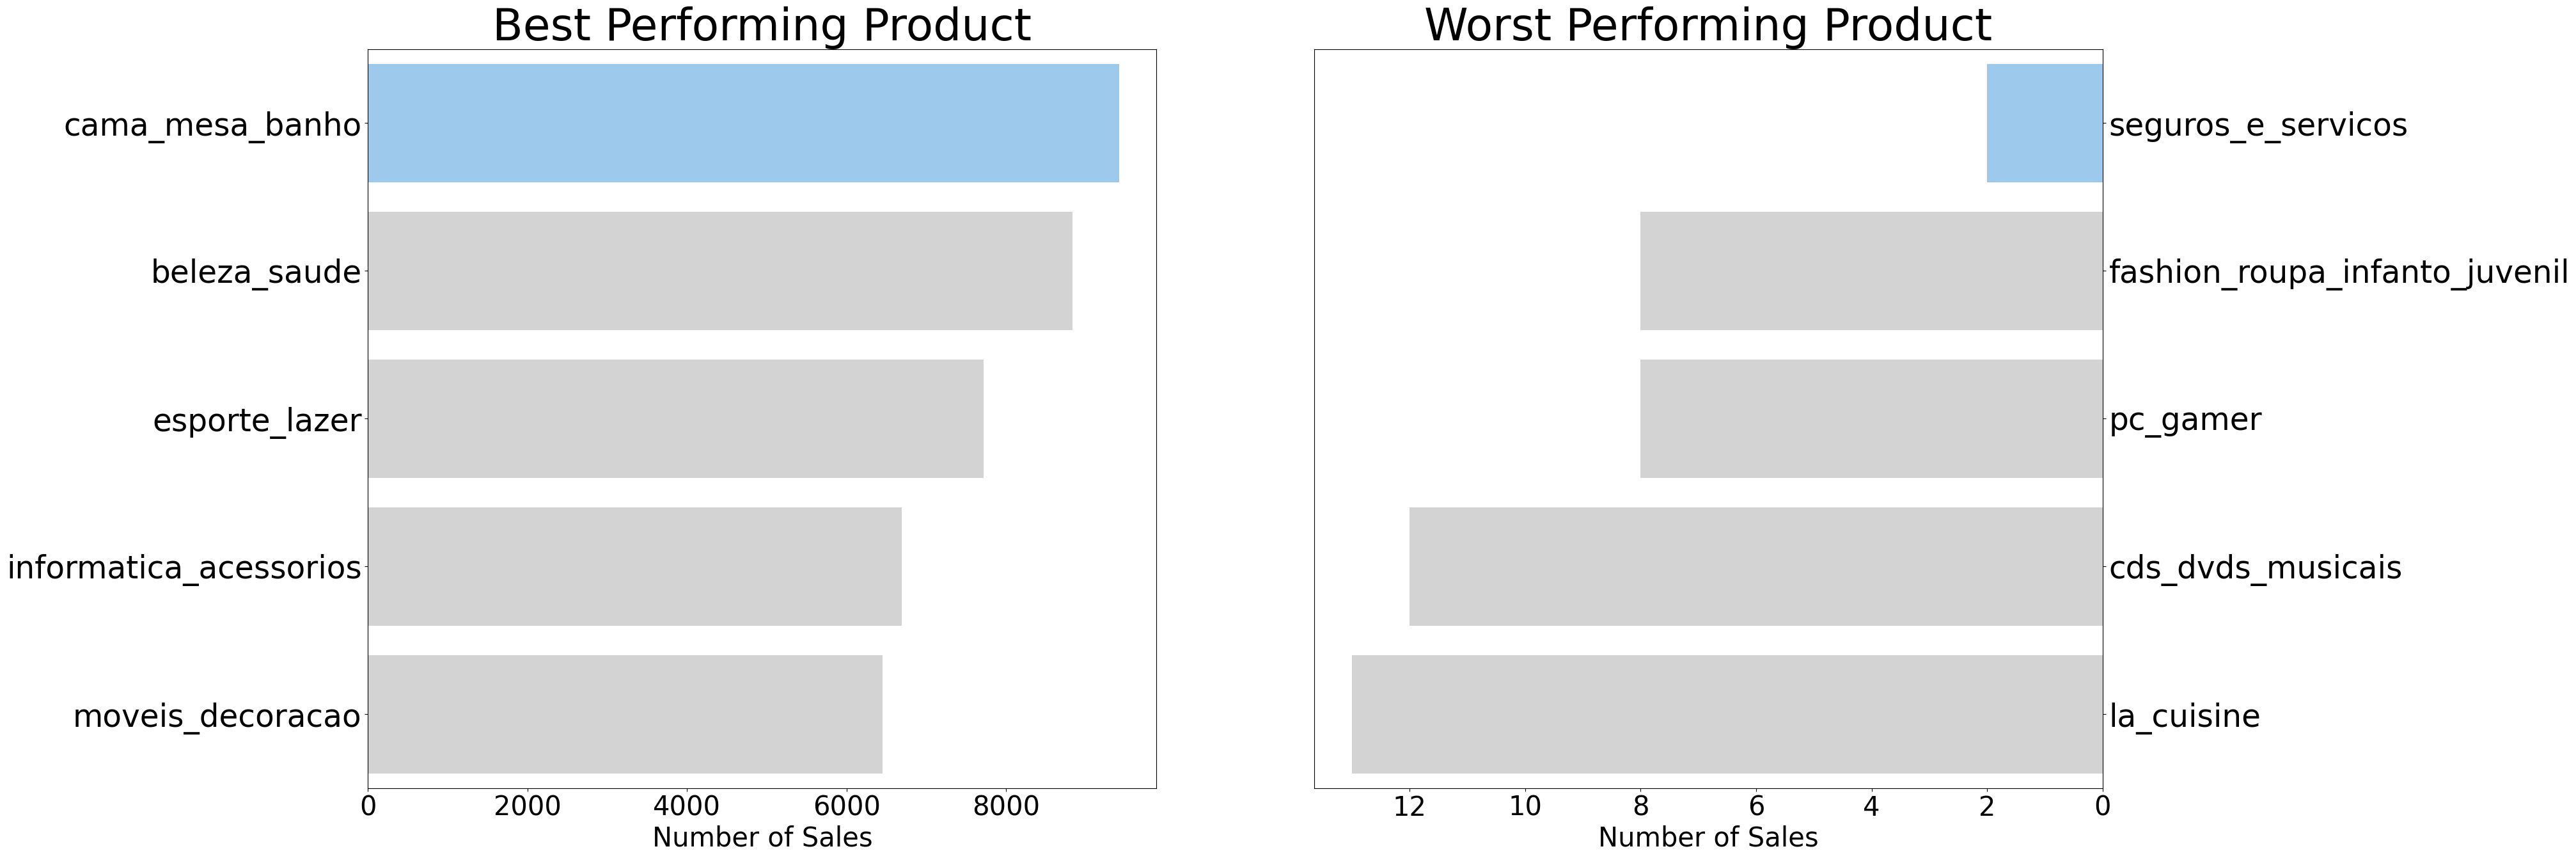

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

### Pertanyaan 5: Bagaimana distribusi waktu order dalam 24 jam? Pada jam berapakah customer paling banyak melakukan order?

In [68]:
waktu_df = all_df.groupby("purchase_time").order_id.nunique().reset_index()

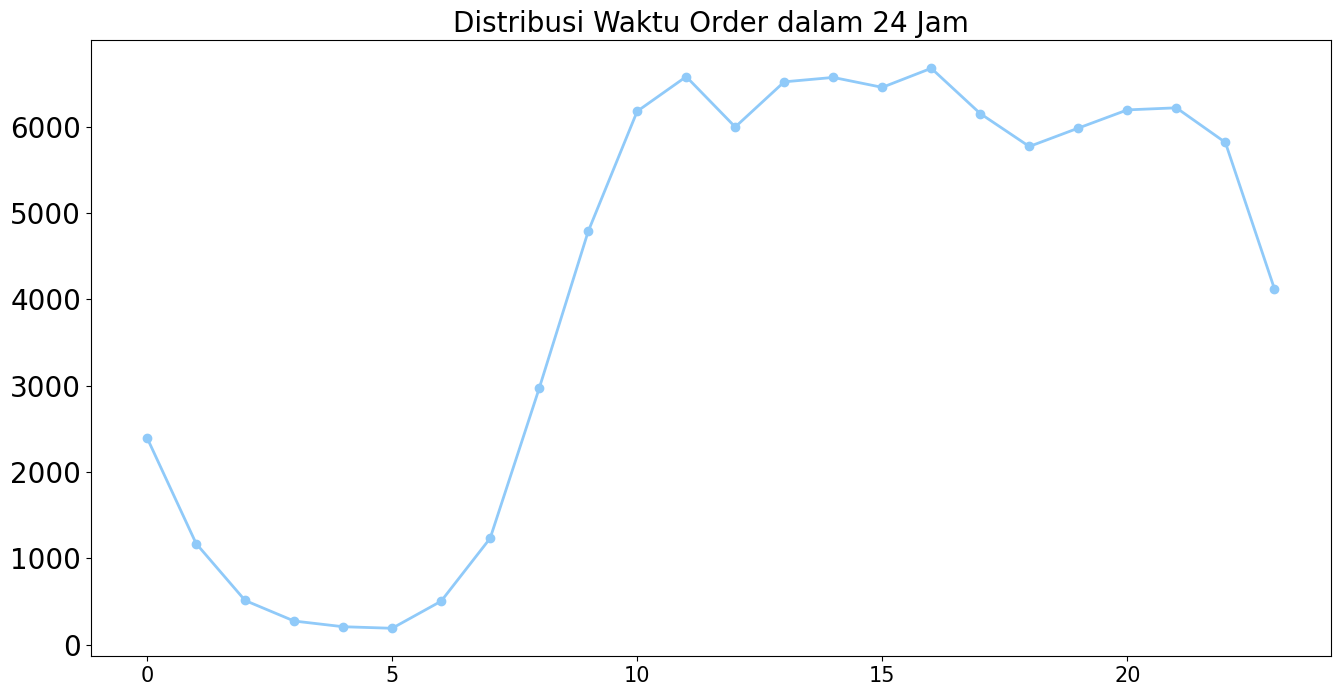

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    waktu_df["purchase_time"],
    waktu_df["order_id"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.title("Distribusi Waktu Order dalam 24 Jam", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

## RFM Analysis

In [70]:
# Hitung Recency, Frequency, dan Monetary
current_date = all_df['order_purchase_timestamp'].max()
rfm_df = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

# Ubah nama kolom
rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm_df

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80
1,000161a058600d5901f007fab4c27140,458,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90
4,000379cdec625522490c315e70c7a9fb,198,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,202,1,54.90
99437,fffeda5b6d849fbd39689bb92087f431,148,1,47.90
99438,ffff42319e9b2d713724ae527742af25,126,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,410,2,21.80


In [71]:
# karena customer_id terlalu panjang, maka dibuatlah id unik baru untuk setiap customer akan analisis lebih efektif
mapping_df = rfm_df['customer_id'].drop_duplicates().reset_index(drop=True).reset_index()
mapping_df.columns = ['cust_id', 'customer_id']

# Gabungkan DataFrame asli dengan DataFrame pemetaan
rfm_df = rfm_df.merge(mapping_df, on='customer_id', how='left')

print("Jumlah customer_id : ", rfm_df['customer_id'].nunique())
print("Jumlah cust_id : ", rfm_df['cust_id'].nunique())

Jumlah customer_id :  99441
Jumlah cust_id :  99441


In [72]:
rfm_df.head(10)

,customer_id,recency,frequency,monetary,cust_id
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,0
1,000161a058600d5901f007fab4c27140,458,1,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,2
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,3
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,4
5,0004164d20a9e969af783496f3408652,553,1,59.99,5
6,000419c5494106c306a97b5635748086,228,1,34.30,6
7,00046a560d407e99b969756e0b10f282,303,1,120.90,7
8,00050bf6e01e69d5c0fd612f1bcfb69c,395,1,69.99,8
9,000598caf2ef4117407665ac33275130,67,1,1107.00,9


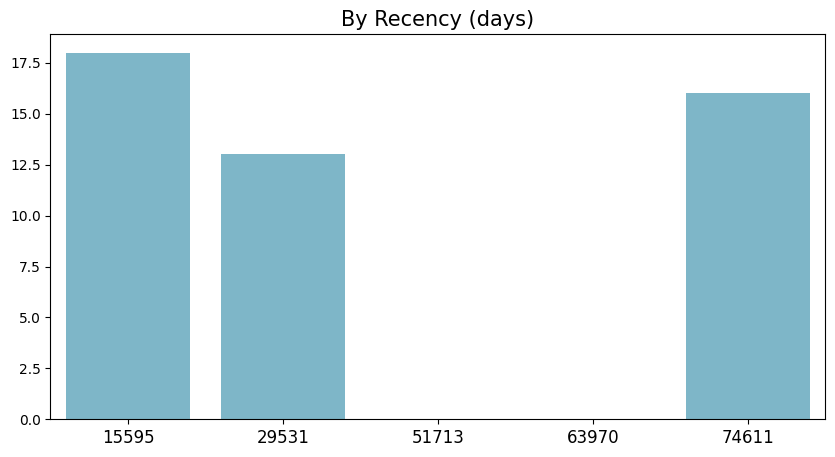

In [73]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency",
    x="cust_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors
)

plt.title("By Recency (days)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

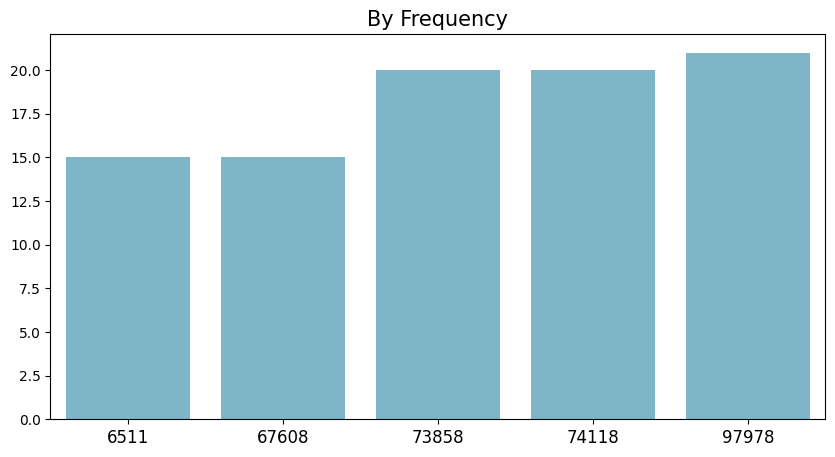

In [74]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="frequency",
    x="cust_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors
)

plt.title("By Frequency", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

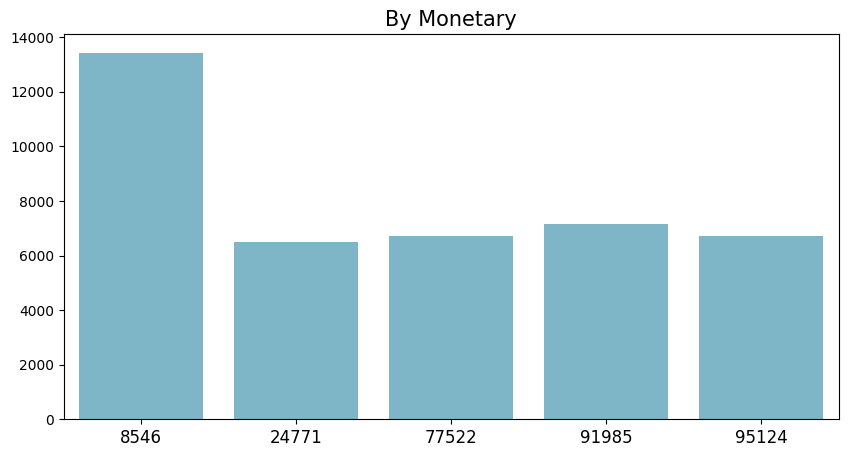

In [75]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="monetary",
    x="cust_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors
)

plt.title("By Monetary", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [76]:
# mengurutkan customer berdasarkan
rfm_df['recency_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['frequency_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['monetary_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,recency,frequency,monetary,cust_id,recency_rank,frequency_rank,monetary_rank
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,0,34293.0,44819.5,51261.5
1,000161a058600d5901f007fab4c27140,458,1,54.90,1,16826.5,44819.5,32087.5
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,2,2859.5,44819.5,80944.5
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,3,21112.5,44819.5,74505.5
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,4,66875.0,44819.5,53707.0


In [77]:
# nirmalisasi ranking customer dalam rentang 0 - 100

rfm_df['r_rank_norm'] = (rfm_df['recency_rank']/rfm_df['recency_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['frequency_rank']/rfm_df['frequency_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['monetary_rank']/rfm_df['monetary_rank'].max())*100

rfm_df.head()

,customer_id,recency,frequency,monetary,cust_id,recency_rank,frequency_rank,monetary_rank,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,0,34293.0,44819.5,51261.5,34.485949,45.071449,51.549663
1,000161a058600d5901f007fab4c27140,458,1,54.90,1,16826.5,44819.5,32087.5,16.921174,45.071449,32.267877
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,2,2859.5,44819.5,80944.5,2.875589,45.071449,81.399523
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,3,21112.5,44819.5,74505.5,21.231289,45.071449,74.924327
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,4,66875.0,44819.5,53707.0,67.251271,45.071449,54.008910


In [78]:
# Hitung skor RFM dengan bobot yang ditentukan
recency_weight = 0.25
frequency_weight = 0.25
monetary_weight = 0.5

rfm_df['RFM_score'] = (rfm_df['r_rank_norm'] * recency_weight) + \
                  (rfm_df['f_rank_norm'] * frequency_weight) + \
                  (rfm_df['m_rank_norm'] * monetary_weight)

# Bulatkan skor RFM menjadi dua angka desimal
rfm_df['RFM_score'] = rfm_df['RFM_score'].round(2)

# Tampilkan DataFrame dengan skor RFM
print(rfm_df[['cust_id', 'RFM_score']].head(10))

   cust_id  RFM_score
0        0      45.66
1        1      31.63
2        2      52.69
3        3      54.04
4        4      55.09
5        5      31.80
6        6      35.00
7        7      55.58
8        8      39.32
9        9      85.00


In [79]:
# segmentasi customer berdasarkan rfm_score

# Batasan skor RFM untuk setiap kategori
bins = [0, 19, 39, 59, 79, 100]
labels = ['Lost Customer', 'Low Value Customer', 'Medium Value Customer', 'High Value Customer', 'Top Customer']

# Menggunakan pd.cut untuk mengelompokkan customer
rfm_df['customer_segment'] = pd.cut(rfm_df['RFM_score'], bins=bins, labels=labels)

print(rfm_df[['cust_id', 'RFM_score', 'customer_segment']].head(20))

    cust_id  RFM_score       customer_segment
0         0      45.66  Medium Value Customer
1         1      31.63     Low Value Customer
2         2      52.69  Medium Value Customer
3         3      54.04  Medium Value Customer
4         4      55.09  Medium Value Customer
5         5      31.80     Low Value Customer
6         6      35.00     Low Value Customer
7         7      55.58  Medium Value Customer
8         8      39.32  Medium Value Customer
9         9      85.00           Top Customer
10       10      67.69    High Value Customer
11       11      25.59     Low Value Customer
12       12      80.40           Top Customer
13       13      43.24  Medium Value Customer
14       14      51.93  Medium Value Customer
15       15      38.64     Low Value Customer
16       16      39.16  Medium Value Customer
17       17      53.13  Medium Value Customer
18       18      44.75  Medium Value Customer
19       19      20.48     Low Value Customer


In [80]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).cust_id.nunique()
customer_segment_df

,customer_segment,cust_id
0,Lost Customer,2627
1,Low Value Customer,26793
2,Medium Value Customer,37591
3,High Value Customer,28052
4,Top Customer,4378


In [81]:
# konversi ke kategori
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost Customer", "Low Value Customer", "Medium Value Customer",
    "High Value Customer", "Top Customer"
])

customer_segment_df

,customer_segment,cust_id
0,Lost Customer,2627
1,Low Value Customer,26793
2,Medium Value Customer,37591
3,High Value Customer,28052
4,Top Customer,4378


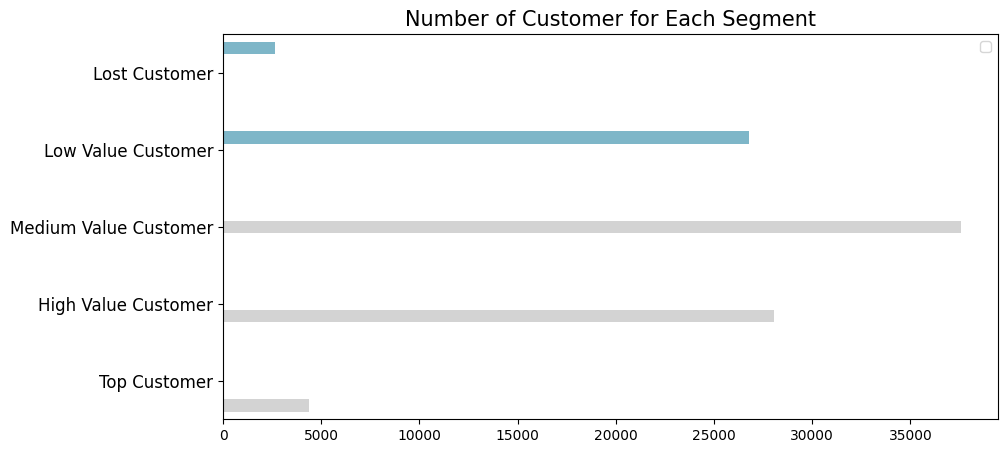

In [82]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="cust_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    hue = "customer_segment"
)

plt.legend()
plt.legend(labels=[])

plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jumlah order pada setiap bulannya cukup mengalami peningkatan signifikan selama tahun 2017. Dapat dilihat pada grafik mulai bulan januari 2017 sampai desember 2017 rata-rata mengalami kenaikan kecuali pada bulan Mei 2017 dan Juli 2017 yang sedikit mengalami penurunan jumlah order. Sedangkan tahun 2018 jumlah order mulai mengalami penurunan. Dimulai dari bulan Januari 2018 yang sudah mengalami penurunan walaupun pada bulan selanjutnya mengalami peningkatan kembali. Namun pada bulan Februari - September 2018 jumlah order dapat dibilang cukup stagnan bahkan cenderuung menurun hingga pada bulan Oktober 2018 jumlah order menurun drastis.

- conclution pertanyaan 2 : Revenue yang didapatkan linier dengan jumlah order yang masuk. Ketika jumlah order meningkat maka revenue di bulan tersebut pun meingkat. Selama tahun 2018 revenue perusahaan berada di tren positif walaupun beberapa kali mengalami penurunan namun tidak berdampak besar dan dapat segera kembali meningkat kembali pada bulan berikutnya. Namun pada 2018 terjadi beberapa kali penurunan revenue yang cukup drastis dan pada bulan berikutnya tidak bisa mengembalikan ke performa terbaiknya. Puncaknya adalah pada akhir tahun 2018 revenue perusahaan terjun bebas seiring jumlah order yang menurun drastis.

- conclusion pertanyaan 3 : Lima kota dengan jumlah order paling banyak dintaranya adalah sao paulo, rio de janeiro, belo horizonte, brasilia dan curitiba. Sao paulo menempati peringkat pertama sebagai kota dengan jumlah order terbanyak dengan total sekitar 15.000 order. Hal ini terpaut cukup jauh dengan kota yang menempati peringkat kedua jumlah order terbanyak dengan total sekitar 8.000 order, yang mana jumlah ini hampir 50% dari total order sao paulo. Sedangkan untuk state dengan jumlah terbanyak yaitu Sao Paulo dengan total order 40.000 an disusul oleh Rio de Janeiro di posisi kedua, Madagaskar di posisi ketiga, Rio Grande do Sul di posisi keempat, dan Puerto Rico di poisis kelima.

- conclusion pertanyaan 4 : Product yang paling diminati customer adalah product category cama_mesa_banho yang telah di order lebih dari 9.000 kali. Selain itu 4 product teratas lainnya yang paling banyak diminati antara lain adalah baleza_saude, esport_lazer, informatica_accesorios, dan movies_decoracao. Sedangkan untuk product yang paling sedikit di order adalah seguros_e_servicos. Selain itu 4 product lainnya yang termasuk product yang paling sedikit dibeli diantaranya adalah fashion_roupa_infanto_juvenil, pc_gamer, cds_dvds_musicais, dan la_cuisine.

- conclusion 5 : Berdasarkan data order customer, dapat dilihat bahwa customer paling banyak melakukan transaksi atau order pada pukul 10.00 - 16.00. Sedangkan waktu yang jarang digunanakan oleh customer untuk bertransaksi yaitu pada pukul 01.00 - 07.00 dengan waktu yang paling sedikit dilakukannya order adalah pukul 05.00.

- conclusion 6 : Dari diagram tersebut dapat dilihat customer dengan recency paling tinggi atau pelanggan yang belum lama melakukan transaksi. Sedangkan rata-rata sutomer melakukan transaksi terakhir 290,3 hari yang lalu dari hari ini.

- conclusion 7 : Pada diagram tersebut dapat dilihat daftar customer yang melakukan pembelian paling sering. Yang paling banyak melakukan pembelian adalah customer dengan ID 88849 yang melakukan pembelian sebanyak 20x. Sedangkan rata-rata customer melakukan pembelian sebanyak 1.14 kali.

- conclusion 8 : Pada diagram tersebut dapat dilihat customer yang paling banyak mengabiskan uangnya untuk berbelanja di e-commerce ini. Pelanggan yang paling banyak membelanjakan uangnya adalah pelanggan dengan customer id 13390 dengan jumlah total hampir 14.000. Sedangkan rata-rata customer mengahbiskan 136,68 ketika untuk berbelanja di e-commerce ini.

- conclusion 9 : Pada chart tersebut dapat diketahui bahwa kelompok customer yang paling banyak adalah medium value customer dengan jumlah 35.000 customer sedangkan kelompok customer dengan jumlah paling sedikit adalah lost customer dengan jumlah kurang dari 5.000 customer. Hal ini bisa dibilang cukup baik karena mayoritas customer kita berada di level medium value dan high value yang dapat kita tingkatkan ke level medium value dan high value customer.

In [83]:
all_df.to_csv('all.csv')